#Zeotap Data Science Assingment


## Assignment Tasks

### Task 1: Exploratory Data Analysis (EDA) and Business Insights
1. Perform EDA on the provided dataset.
2. Derive at least 5 business insights from the EDA.
   - Write these insights in short point-wise sentences (maximum 100 words per insight).

#### Deliverables:
- A Jupyter Notebook/Python script containing your EDA code.
- A PDF report with business insights (maximum 500 words).

# Dataset Overview

This notebook contains three CSV files that provide information about customers, products, and transactions. Below is a detailed description of each file and its columns:

## 1. Customers.csv
Contains information about the customers of the business.

| Column Name     | Description                                    |
|-----------------|------------------------------------------------|
| `CustomerID`    | Unique identifier for each customer.           |
| `CustomerName`  | Name of the customer.                         |
| `Region`        | Continent where the customer resides.         |
| `SignupDate`    | Date when the customer signed up.             |

## 2. Products.csv
Contains details about the products available for sale.

| Column Name     | Description                                    |
|-----------------|------------------------------------------------|
| `ProductID`     | Unique identifier for each product.           |
| `ProductName`   | Name of the product.                          |
| `Category`      | Product category.                             |
| `Price`         | Product price in USD.                         |

## 3. Transactions.csv
Captures the details of transactions made by customers.

| Column Name     | Description                                    |
|-----------------|------------------------------------------------|
| `TransactionID` | Unique identifier for each transaction.       |
| `CustomerID`    | ID of the customer who made the transaction.  |
| `ProductID`     | ID of the product sold.                       |
| `TransactionDate` | Date of the transaction.      |
| `Quantity`      | Quantity of the product purchased.|
| `TotalValue`    | Total value of the transaction.|
| `Price`         | Price of the product sold.               |




In [67]:
import pandas as pd

# Load the datasets
try:
  customers = pd.read_csv('/content/Customers.csv')
  products = pd.read_csv('/content/Products.csv')
  transactions = pd.read_csv('/content/Transactions.csv')
except FileNotFoundError:
  print("One or more CSV files not found. Please ensure they are in the same directory or provide the correct path.")
  exit()



In [68]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [69]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [70]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# Function to calculate basic statistics for numerical and categorical columns
def basic_statistics(df, name):
    print(f"\n{'='*30}\nBasic Statistics for {name}\n{'='*30}")

    # Check for missing values
    print(f"\nMissing Values:\n{df.isnull().sum()}")

    # General Information
    print(f"\nGeneral Info:\n")
    print(df.info())

    # Descriptive statistics for numerical columns
    print(f"\nDescriptive Statistics (Numerical):\n")
    print(df.describe())

    # Unique values in categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        print(f"\nColumn: {col}\nUnique Values: {df[col].nunique()}\nTop 5 Frequent Values:\n{df[col].value_counts().head()}")

    # Overall shape of the dataset
    print(f"\nDataset Shape: {df.shape}")

#1. Basic statistics for each CSV

In [73]:
basic_statistics(customers, "Customers")


Basic Statistics for Customers

Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

General Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Descriptive Statistics (Numerical):

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Column: CustomerID
Unique Values: 200
Top 5 Frequent Values:
CustomerID
C0001    1
C0138    1
C

In [74]:
basic_statistics(products, "Products")


Basic Statistics for Products

Missing Values:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

General Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Descriptive Statistics (Numerical):

            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Column: ProductID
Unique Values: 100
Top 5 Frequent Values:
ProductID
P001    1
P064    1
P074    1
P073    1
P072    1
Name: count, dtype: int64

Column: ProductName
Unique Values: 66
Top 5 Frequent Values:
ProductName
ActiveWear Smartwatch 

In [75]:
basic_statistics(transactions, "Transactions")


Basic Statistics for Transactions

Missing Values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

General Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None

Descriptive Statistics (Numerical):

          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117

# 2. Perform EDA on Each Dataset

a) Customers Dataset

Check for missing values and duplicates.

Analyze customer distribution by region.

Explore signup trends.

In [76]:
# Check for missing values
print(customers.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


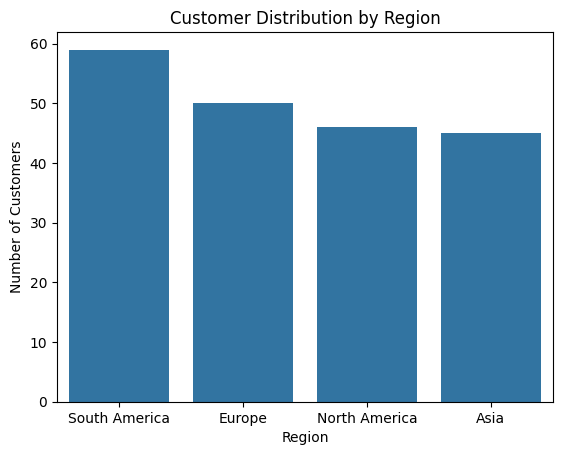

In [77]:
# Region distribution
region_counts = customers['Region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

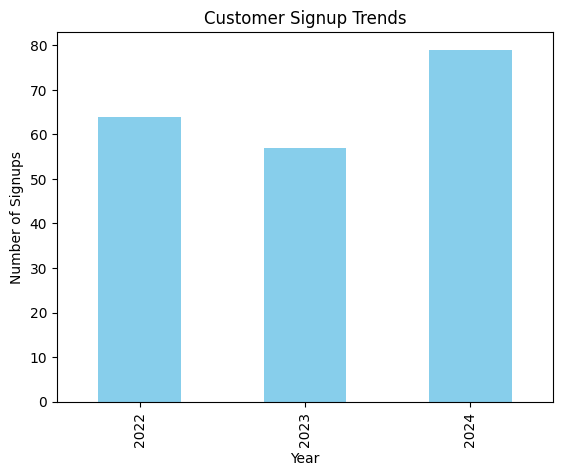

In [78]:
# Signup trends
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signup_trends = customers['SignupDate'].dt.year.value_counts().sort_index()
signup_trends.plot(kind='bar', color='skyblue')
plt.title('Customer Signup Trends')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()

b) Products Dataset

Analyze product pricing and category distributions.

Identify top-priced and least-priced products.

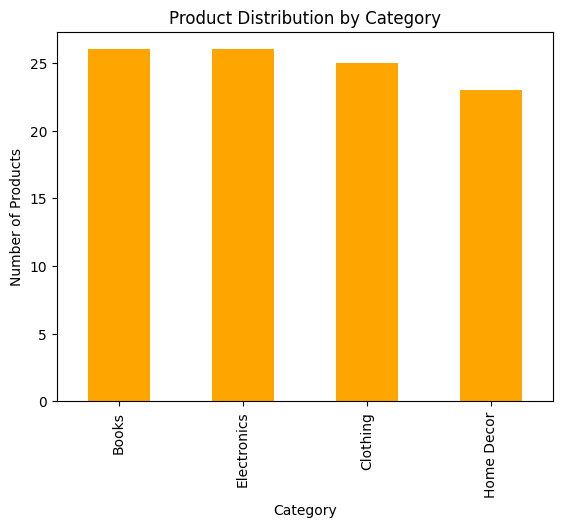

In [79]:
# Category distribution
category_counts = products['Category'].value_counts()
category_counts.plot(kind='bar', color='orange')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

In [80]:
# Price statistics
print(products['Price'].describe())

count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64


In [81]:
# Top-priced and least-priced products
top_priced_product = products.loc[products['Price'].idxmax()]
least_priced_product = products.loc[products['Price'].idxmin()]
print(f"Top-Priced Product: {top_priced_product['ProductName']}, Price: ${top_priced_product['Price']}")
print(f"Least-Priced Product: {least_priced_product['ProductName']}, Price: ${least_priced_product['Price']}")

Top-Priced Product: TechPro Textbook, Price: $497.76
Least-Priced Product: SoundWave Smartwatch, Price: $16.08


c) Transactions Dataset

Analyze transaction trends over time.

Identify the most purchased products.

Study customer spending patterns.

In [82]:
# Convert dates to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

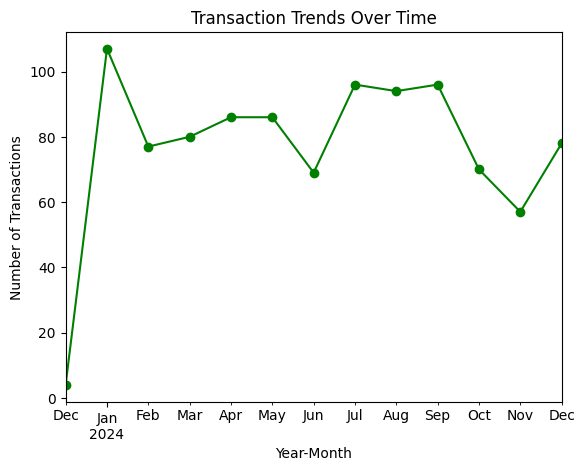

In [83]:
# Transaction trends over time
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_transactions = transactions['YearMonth'].value_counts().sort_index()
monthly_transactions.plot(kind='line', marker='o', color='green')
plt.title('Transaction Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.show()


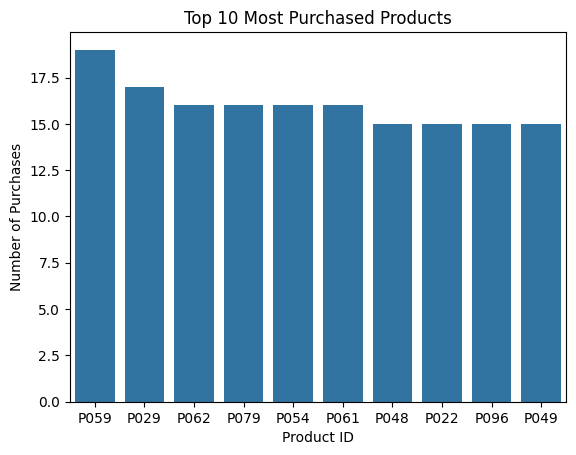

In [84]:
# Most purchased products
top_products = transactions['ProductID'].value_counts().head(10)
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Purchases')
plt.show()

In [85]:
# Customer spending patterns
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print(customer_spending)


CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


#3. Merge Datasets for Richer Insights
Combine datasets for deeper analysis.

In [86]:
# Additional libraries for advanced analysis
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
# Merge datasets
transactions_products = pd.merge(transactions, products, on='ProductID', how='left')
full_data = pd.merge(transactions_products, customers, on='CustomerID', how='left')

# Preview merged dataset
full_data.head()


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,YearMonth,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,2024-08,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,2024-05,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,2024-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,2024-03,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,2024-03,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15


In [88]:
# 1. Customer Demographics and Transaction Insights

<ipython-input-89-cec78099d238>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_spending.index, y=region_spending.values, palette="viridis")


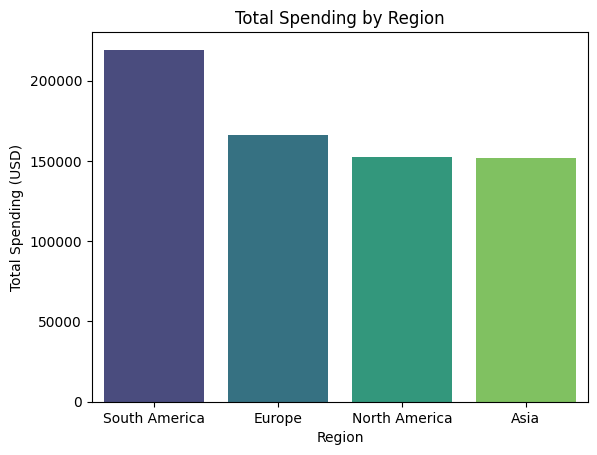

In [89]:
# Region vs. Total Spending by Customers
region_spending = full_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
sns.barplot(x=region_spending.index, y=region_spending.values, palette="viridis")
plt.title('Total Spending by Region')
plt.xlabel('Region')
plt.ylabel('Total Spending (USD)')
plt.show()

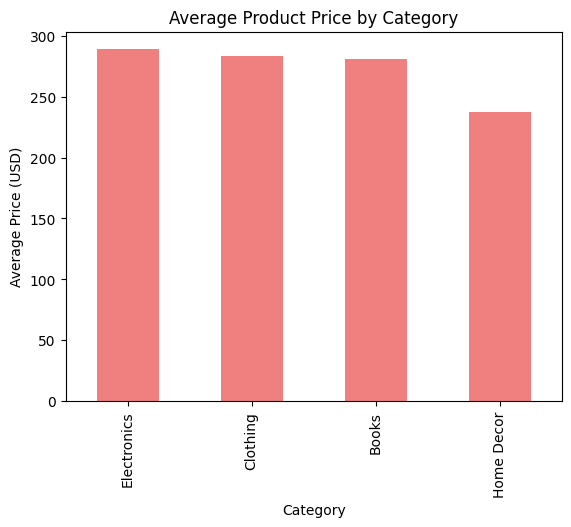

In [90]:
# 2. Product Performance Insights
# Average price per product category
category_avg_price = full_data.groupby('Category')['Price_y'].mean().sort_values(ascending=False)
category_avg_price.plot(kind='bar', color='lightcoral')
plt.title('Average Product Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price (USD)')
plt.show()

In [91]:
# 3. Customer-Product Relationship
# Top 10 most frequent customers for each product
top_10_customers_per_product = full_data.groupby(['ProductID', 'CustomerID']).size().reset_index(name='PurchaseCount')
top_10_customers_per_product = top_10_customers_per_product.groupby('ProductID').apply(lambda x: x.nlargest(10, 'PurchaseCount')).reset_index(drop=True)
top_10_customers_per_product.head(20)

<ipython-input-91-67dfd5afa1ff>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_customers_per_product = top_10_customers_per_product.groupby('ProductID').apply(lambda x: x.nlargest(10, 'PurchaseCount')).reset_index(drop=True)


,ProductID,CustomerID,PurchaseCount
0,P001,C0017,1
1,P001,C0019,1
2,P001,C0024,1
3,P001,C0036,1
4,P001,C0045,1
5,P001,C0071,1
6,P001,C0105,1
7,P001,C0191,1
8,P002,C0003,1
9,P002,C0031,1


<ipython-input-92-1c27c89349f7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_revenue.index, y=product_revenue.values, palette="coolwarm")


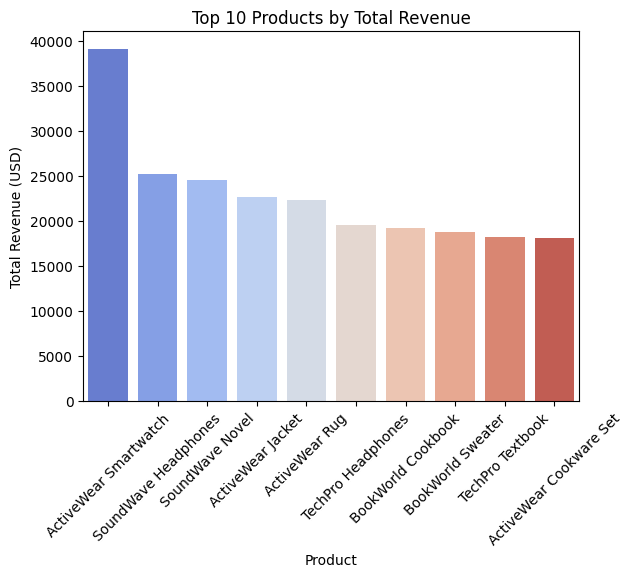

In [92]:
# 4. Sales and Revenue Analysis
# Total revenue per product
product_revenue = full_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=product_revenue.index, y=product_revenue.values, palette="coolwarm")
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Product')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

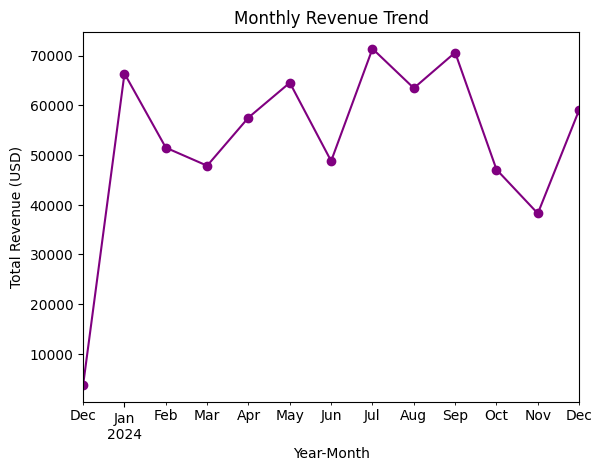

In [93]:
# 5. Seasonality and Time-Based Trends
# Transaction trends by year-month (already calculated as 'YearMonth' earlier)
monthly_revenue = full_data.groupby('YearMonth')['TotalValue'].sum()
monthly_revenue.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Revenue Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue (USD)')
plt.show()

In [94]:
# High-revenue periods (for seasonality analysis)
top_months = monthly_revenue.sort_values(ascending=False).head(3)
print(f"Top 3 Months for Revenue: {top_months}")

Top 3 Months for Revenue: YearMonth
2024-07    71366.39
2024-09    70603.75
2024-01    66376.39
Freq: M, Name: TotalValue, dtype: float64


#Univariate Analysis
Univariate analysis involves analyzing the distribution of each individual variable, typically through summary statistics, histograms, box plots, and bar charts.

In [95]:
# Univariate Analysis on Numerical Variables (Price, TotalValue, Quantity)
numerical_columns = ['Price_y', 'TotalValue', 'Quantity']

In [96]:
# Summary statistics for numerical columns
print(full_data[numerical_columns].describe())

          Price_y   TotalValue     Quantity
count  1000.00000  1000.000000  1000.000000
mean    272.55407   689.995560     2.537000
std     140.73639   493.144478     1.117981
min      16.08000    16.080000     1.000000
25%     147.95000   295.295000     2.000000
50%     299.93000   588.880000     3.000000
75%     404.40000  1011.660000     4.000000
max     497.76000  1991.040000     4.000000


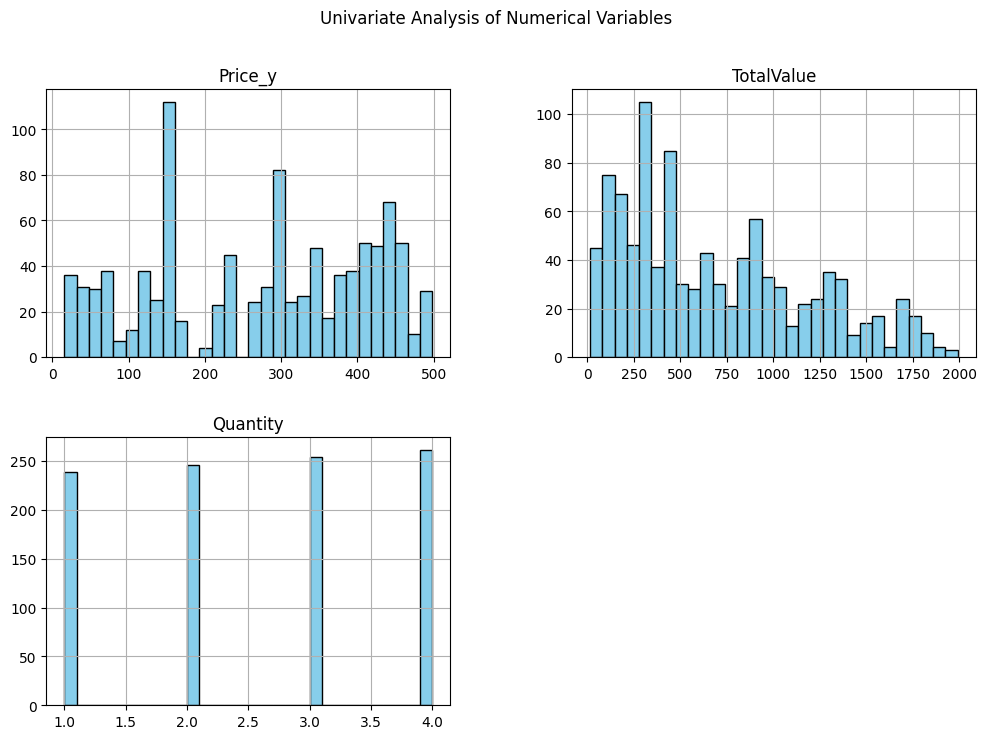

In [97]:
# Histograms for numerical columns
full_data[numerical_columns].hist(bins=30, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Univariate Analysis of Numerical Variables')
plt.show()

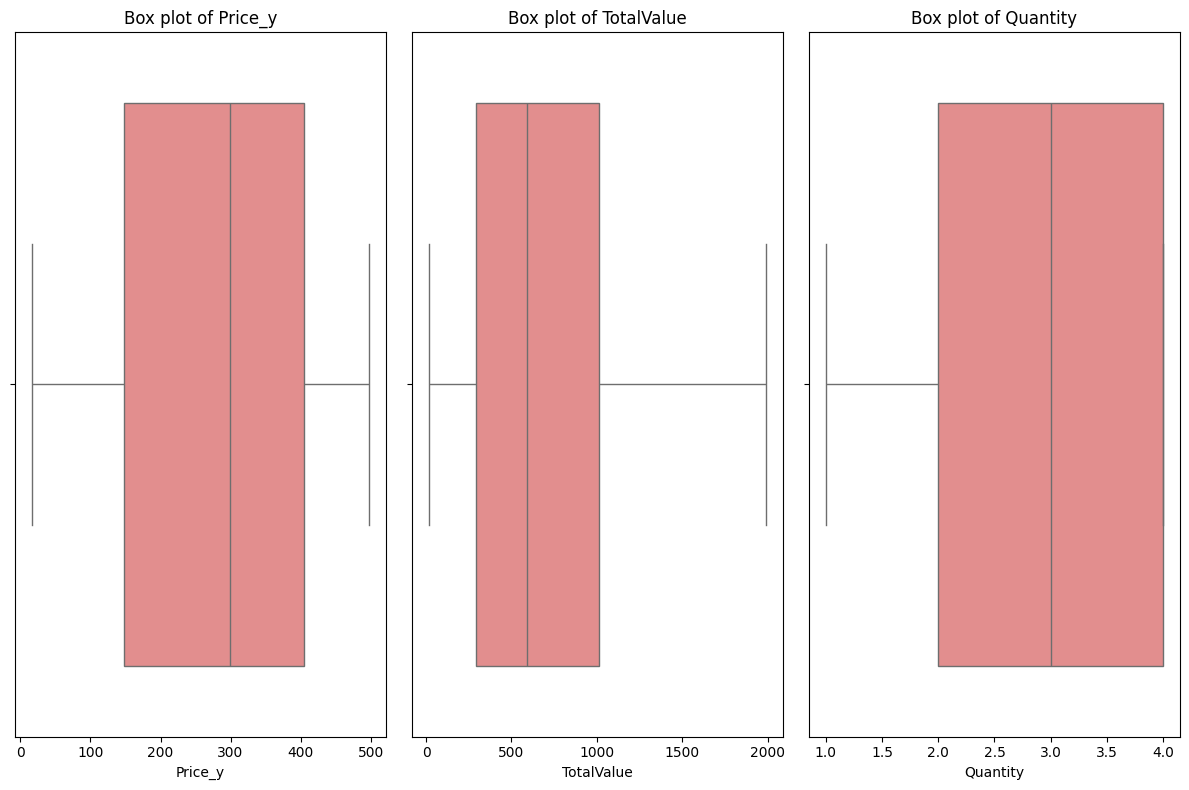

In [98]:
# Box plots for numerical columns to check for outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=full_data[col], color='lightcoral')
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

<ipython-input-99-5c256dd187c3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=full_data, palette='Set2')


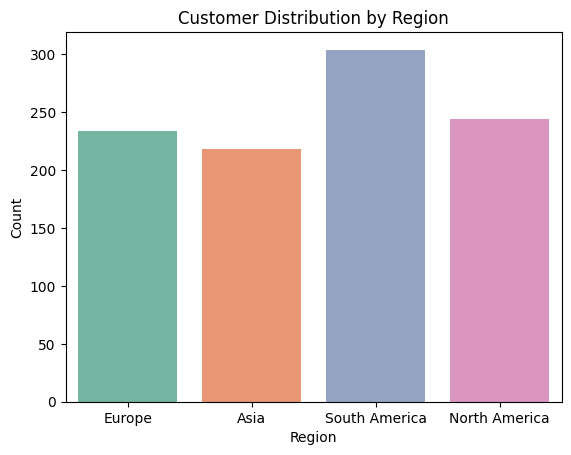

In [99]:
# Univariate Analysis on Categorical Variables (Region, Category)
# Region distribution
sns.countplot(x='Region', data=full_data, palette='Set2')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

<ipython-input-100-17e2d6dae4b2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=full_data, palette='Set3')


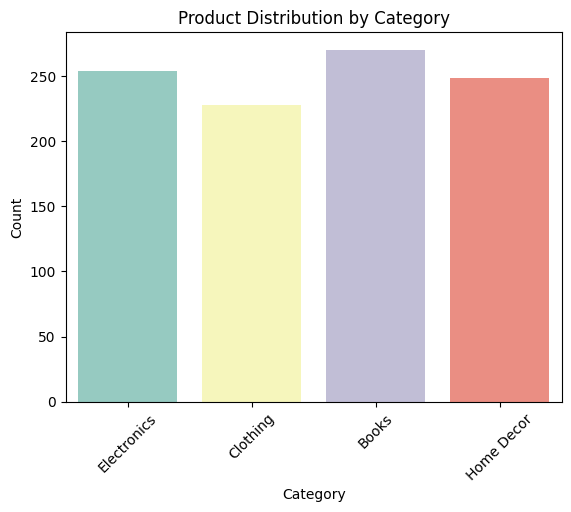

In [100]:
# Product Category distribution
sns.countplot(x='Category', data=full_data, palette='Set3')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#Bivariate Analysis
Bivariate analysis helps us understand the relationships between two variables. We will analyze both categorical-categorical and numerical-numerical relationships.

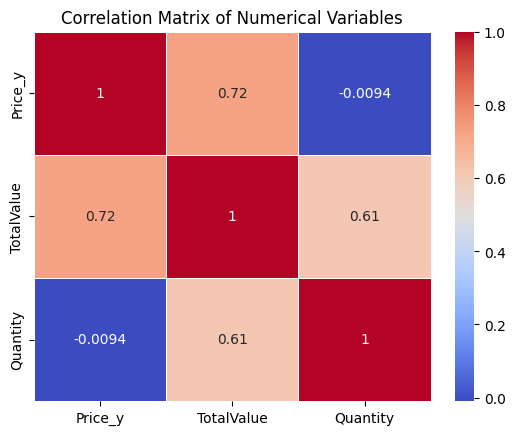

In [101]:
""""1. Numerical vs. Numerical (Correlation)"""

# Correlation matrix to identify relationships between numerical variables

correlation_matrix = full_data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

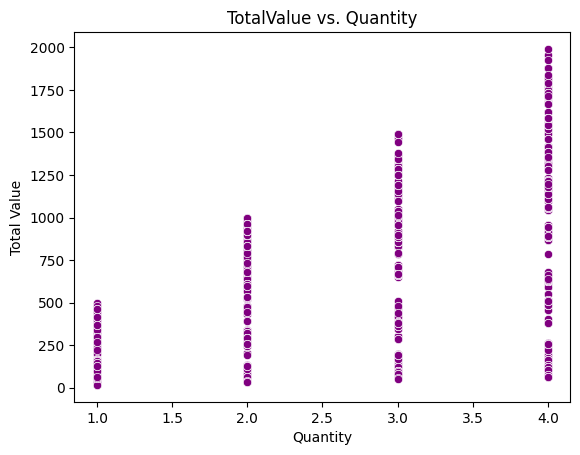

In [102]:
# Scatter plot between TotalValue and Quantity (numerical vs. numerical)
sns.scatterplot(x='Quantity', y='TotalValue', data=full_data, color='purple')
plt.title('TotalValue vs. Quantity')
plt.xlabel('Quantity')
plt.ylabel('Total Value')
plt.show()

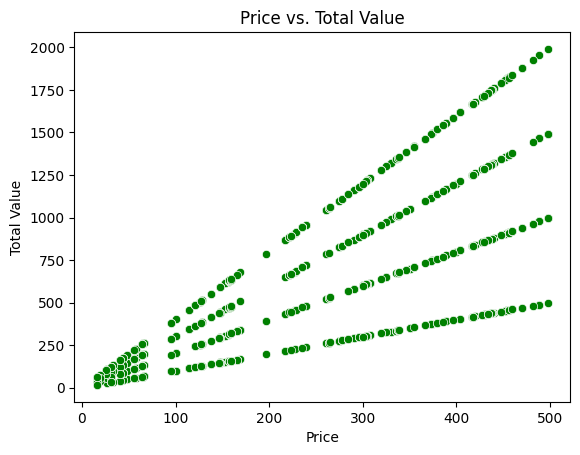

In [103]:
# Scatter plot between Price and TotalValue (numerical vs. numerical)
sns.scatterplot(x='Price_y', y='TotalValue', data=full_data, color='green')
plt.title('Price vs. Total Value')
plt.xlabel('Price')
plt.ylabel('Total Value')
plt.show()

<ipython-input-104-b262fa393836>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='TotalValue', data=full_data, palette='Set2')


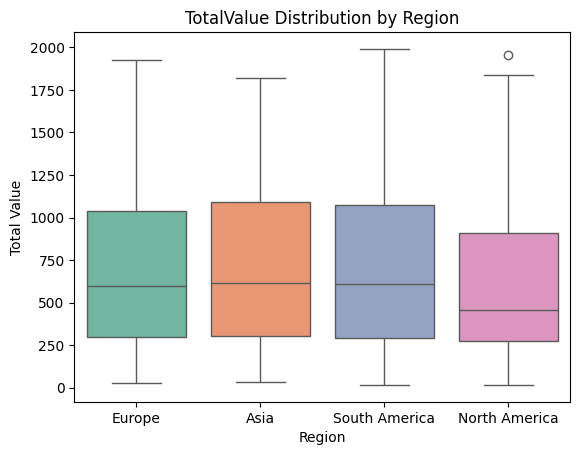

In [104]:
"""2. Numerical vs. Categorical"""

# Boxplot of TotalValue by Region (numerical vs. categorical)
sns.boxplot(x='Region', y='TotalValue', data=full_data, palette='Set2')
plt.title('TotalValue Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Value')
plt.show()

<ipython-input-105-b75e157d1031>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='TotalValue', data=full_data, palette='Set3')


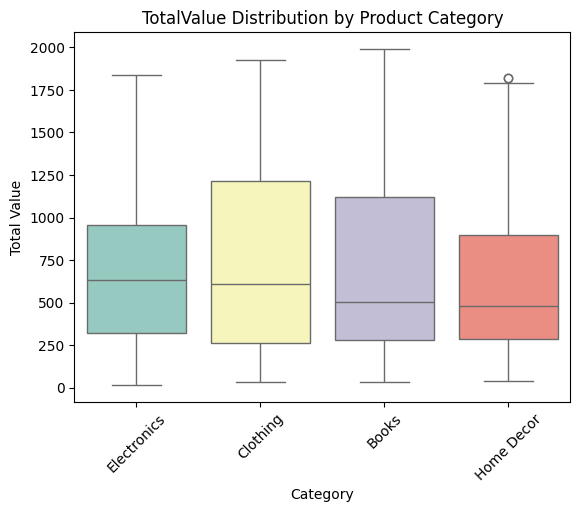

In [105]:
# Boxplot of TotalValue by Product Category (numerical vs. categorical)
sns.boxplot(x='Category', y='TotalValue', data=full_data, palette='Set3')
plt.title('TotalValue Distribution by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.show()

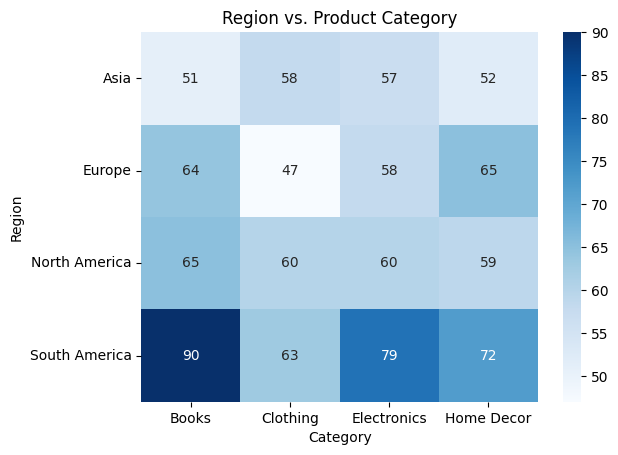

In [106]:
""" 3. Categorical vs. Categorical"""

# Cross-tabulation and heatmap for Region vs. Category

region_category = pd.crosstab(full_data['Region'], full_data['Category'])
sns.heatmap(region_category, annot=True, cmap='Blues', fmt='d')
plt.title('Region vs. Product Category')
plt.xlabel('Category')
plt.ylabel('Region')
plt.show()


#Explanation of Univariate and Bivariate Analysis Steps:

## Univariate Analysis

### Numerical Columns (Price, TotalValue, Quantity)
1. **Summary Statistics**:  
   Provides basic statistics like mean, median, standard deviation, and percentiles for numerical columns like Price, TotalValue, and Quantity.

2. **Histograms**:  
   Visualizes the distribution of values for Price, TotalValue, and Quantity.

3. **Box Plots**:  
   Helps identify outliers for numerical variables like Price, TotalValue, and Quantity.

### Categorical Columns (Region, Category)
1. **Count Plots**:  
   Displays the count of occurrences for each category (Region and Product Category), helping to understand the distribution.

## Bivariate Analysis

### Numerical vs. Numerical
1. **Correlation Matrix**:  
   Shows how different numerical variables (like Price, Quantity, TotalValue) are correlated with each other.

2. **Scatter Plots**:  
   Visualizes the relationship between TotalValue and Quantity, and between Price and TotalValue. Scatter plots help identify any linear or non-linear relationships.

### Numerical vs. Categorical
1. **Boxplots by Region and Category**:  
   Visualizes how the TotalValue varies across different regions and categories, helping to see differences in spending patterns.

### Categorical vs. Categorical
1. **Heatmap for Region vs. Category**:  
   Shows the distribution of product categories across different regions, helping identify regional preferences.

#Pairplot

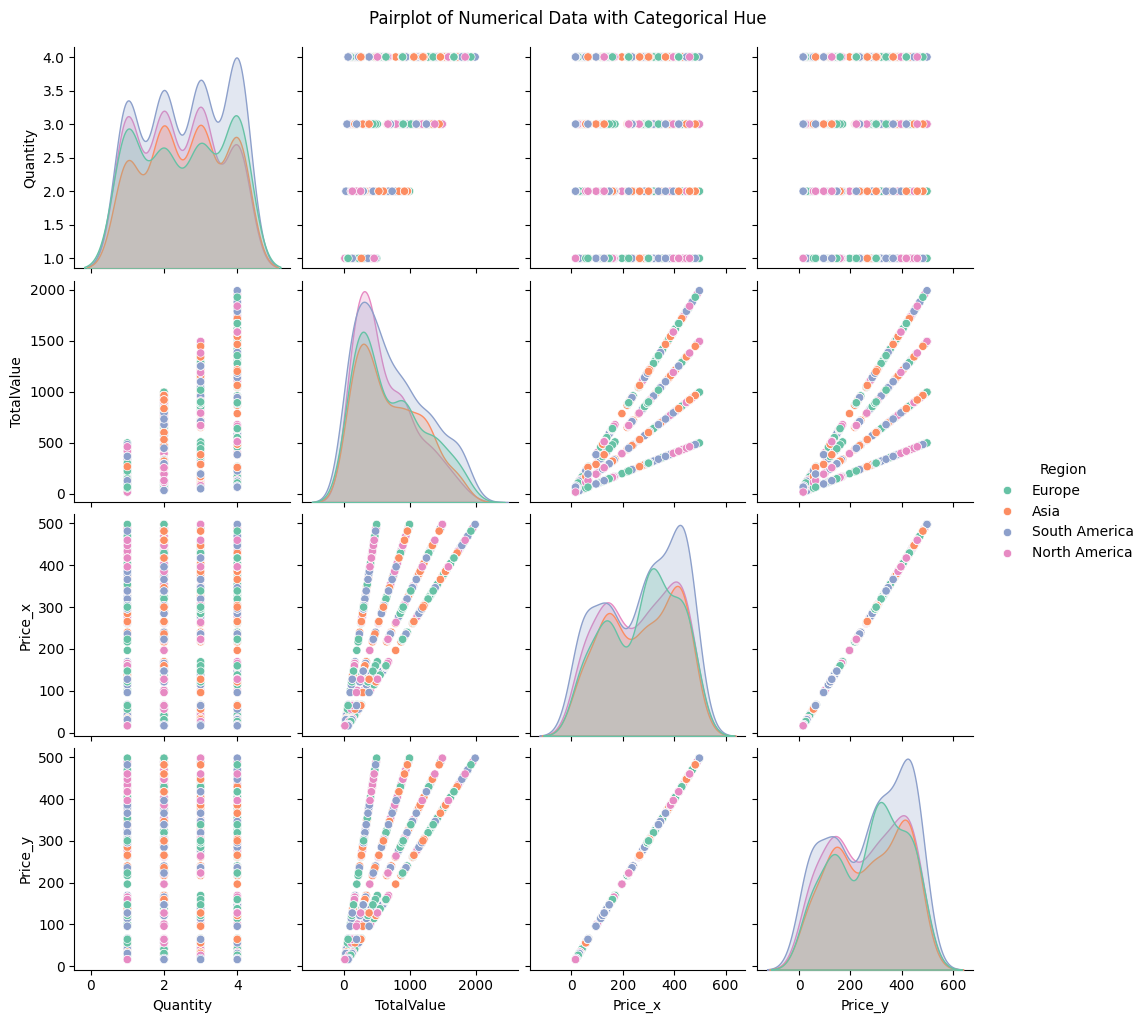

In [107]:

import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for numerical features
sns.pairplot(full_data, hue='Region', palette='Set2', diag_kind='kde', height=2.5)
plt.suptitle('Pairplot of Numerical Data with Categorical Hue', y=1.02)
plt.show()


# Pairplot Visualization

## Purpose
A Pairplot is an efficient way to visualize the relationships between multiple numerical features in your dataset while also considering the categorical data. In this case, the Pairplot will help you understand:

- How numerical features interact with each other (e.g., Price, TotalValue, etc.).
- How categorical data (e.g., Region) influences the numerical data.

## Features of the Plot

### Diagonal: Distribution of Individual Numerical Features
- The diagonal of the plot shows the distribution of each individual numerical feature. Since we've set `diag_kind='kde'`, it uses a Kernel Density Estimate (KDE) plot. A KDE is a smoothed version of the histogram, providing a continuous curve representing the distribution of the data.

    - **Price**: Helps determine if the distribution is skewed towards high-end or budget products.
    - **TotalValue**: Helps identify if customers make a lot of small transactions or if large transactions dominate.

### Off-Diagonal: Scatter Plots of Numerical Feature Pairs
- The off-diagonal plots show the scatter plots of each pair of numerical features. For example:
    - The scatter plot between **Price** and **TotalValue** will show if higher-priced items tend to have higher total transaction values.
    - The scatter plot between **Quantity** and **Price** helps understand if more expensive products are purchased in larger or smaller quantities.

### Categorical Data Influence (Hue)
- `hue='Region'`: The categorical data comes into play with the `hue` parameter. By specifying **Region** as the hue, the plot colors the data points based on the region of the customer (e.g., Asia, Europe). This helps compare how different regions behave across the numerical features.

    - Example: You may observe that customers from Asia have a different distribution of **TotalValue** compared to those from Europe, helping you understand regional spending patterns.

## Customizing the Plot
- **height=2.5**: Adjusts the size of each plot for clarity. If the plot is too small, interpreting the scatter plots can be difficult.
- **palette='Set2'**: This color scheme is used for the regions, making the plot visually appealing and easier to differentiate.

## Takeaways

- **Trends and Relationships**: Identify trends or correlations between features (e.g., does a higher price lead to higher total transaction values?).
- **Outliers**: The scatter plots can highlight any extreme data points (outliers) that might require further attention.
- **Regional Differences**: The color coding by Region helps identify how regions differ in terms of customer behavior and spending patterns.



# Insight Which We Can Derive
If customers from **Asia** are purchasing more products but the average transaction value is lower than customers from **North America**, you might infer that customers from Asia tend to buy in bulk, while North American customers prefer premium, higher-priced items.
